In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
refugees_df = pd.read_csv('../data/refugees.csv', skipfooter=4, engine='python')
refugees_df.head()



,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees*,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations**,Total refugees and people in refugee-like situations assisted by UNHCR
0,Afghanistan,Iran (Islamic Rep. of),2021,38,38,38,38
1,Afghanistan,Pakistan,2021,72188,123,72188,123
2,Albania,China,2021,14,0,14,0
3,Albania,Egypt,2021,5,0,5,0
4,Albania,Iraq,2021,5,0,5,0


In [6]:
refugees_df = refugees_df.rename(columns={"Country or territory of asylum or residence": "Acceptor", "Country or territory of origin":"Origin", "Refugees*": "Refugees"})

In [7]:
refugees_df.isnull().values.any()

False

In [8]:
cols_to_drop = [x for x in list(refugees_df) if x not in ["Acceptor", "Origin", "Refugees", "Year"]]
refugees_df = refugees_df.drop(columns=cols_to_drop)

In [9]:
refugees_df.head()

,Acceptor,Origin,Year,Refugees
0,Afghanistan,Iran (Islamic Rep. of),2021,38
1,Afghanistan,Pakistan,2021,72188
2,Albania,China,2021,14
3,Albania,Egypt,2021,5
4,Albania,Iraq,2021,5


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
    }
</style>
<div class="md">
<ul>
<li>How many countries of origin and acceptors?  </li>
<li>What is the time frame of the data? </li>
<ul>
</div>

In [14]:
print("Number of Host Countries: ", refugees_df["Acceptor"].nunique())
print("Number of Origin Countries: ", refugees_df["Origin"].nunique())
print("Years of Data: ", refugees_df["Year"].nunique(), "from ", refugees_df["Year"].min(), "to", refugees_df["Year"].max())

Number of Host Countries:  183
Number of Origin Countries:  201
Years of Data:  47 from  1975 to 2021


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        margin-top: 20px;
        margin-bottom:20px;
    }
</style>
<div class="md">
<ul>
<li>How many total refugees were there in each year? Show a graph.  </li>
<ul>
</div>


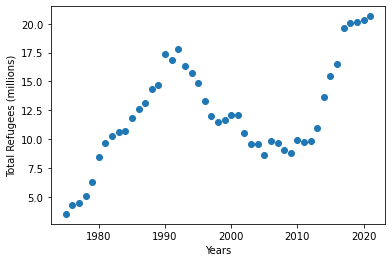

In [103]:
refugees_by_year_df = refugees_df.groupby(by="Year").sum()
refugees_by_year_df = refugees_by_year_df.reset_index()
plt.scatter(refugees_by_year_df["Year"], refugees_by_year_df["Refugees"]/1000000)
plt.ylabel("Total Refugees (millions)")
plt.xlabel("Years")
plt.show()

<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
    }
</style>
<div class="md">
<ul>
<li>What are the top 5 countries that refugees originated from in any given year? </li>
<li>What are the top 5 countries that refugees migrated to in the same year? </li>
<li>Show both numerical values and percentages.</li>
<ul>
</div>

In [55]:
# Creating a function to get the total number of refugees in a given year
def total_refugees_by_year(yr):
    return refugees_df[refugees_df["Year"] == yr]["Refugees"].sum()


# Creating a function to get the total number of refugees in any year for both Origin countries and Host Countries 
def total_refugees_by_year_and_country(yr, country_type="Origin"):
    total = total_refugees_by_year(yr)
    grouped = refugees_df[refugees_df["Year"] == yr].groupby(by=country_type).sum()
    df = grouped.reset_index()
    df = df.drop(columns=["Year"])
    df["Percentage"] = 100*df["Refugees"]/total
    return df.sort_values(by="Refugees", ascending=False).round({"Percentage":0})




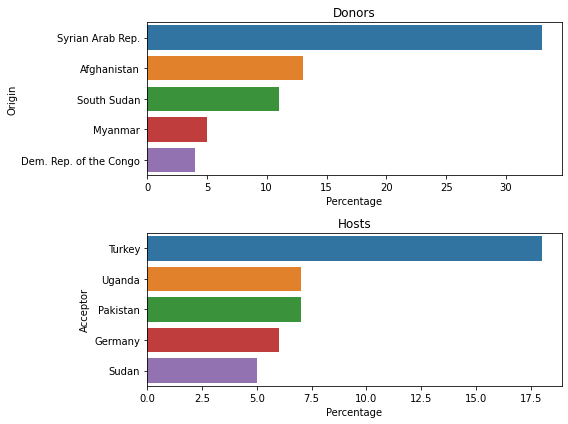

In [76]:
yr = 2021
donors = total_refugees_by_year_and_country(yr, "Origin").head()
hosts = total_refugees_by_year_and_country(yr, "Acceptor").head()
# Create a figure and two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plot the donors data on the first subplot
sns.barplot(data=donors, x="Percentage", y="Origin", ax=axes[0])
axes[0].set_title("Donors")

# Plot the hosts data on the second subplot
sns.barplot(data=hosts, x="Percentage", y="Acceptor", ax=axes[1])
axes[1].set_title("Hosts")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
country_list = refugees_df["Acceptor"].unique()

Create a function to show the refugee acceptance history of any country

In [ ]:
country_list

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Rep.', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'Colombia', 'Congo, Republic of',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', 'Dem. Rep. of the Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
 

In [90]:
def refugee_acceptance_history(country):
    df = refugees_df[refugees_df["Acceptor"]==country].groupby(by="Year").sum()
    df.reset_index(inplace=True)
    df["Total Refugees"] = df["Year"].apply(total_refugees_by_year)
    df["Percentage"] = 100*df["Refugees"]/df["Total Refugees"]
    return df

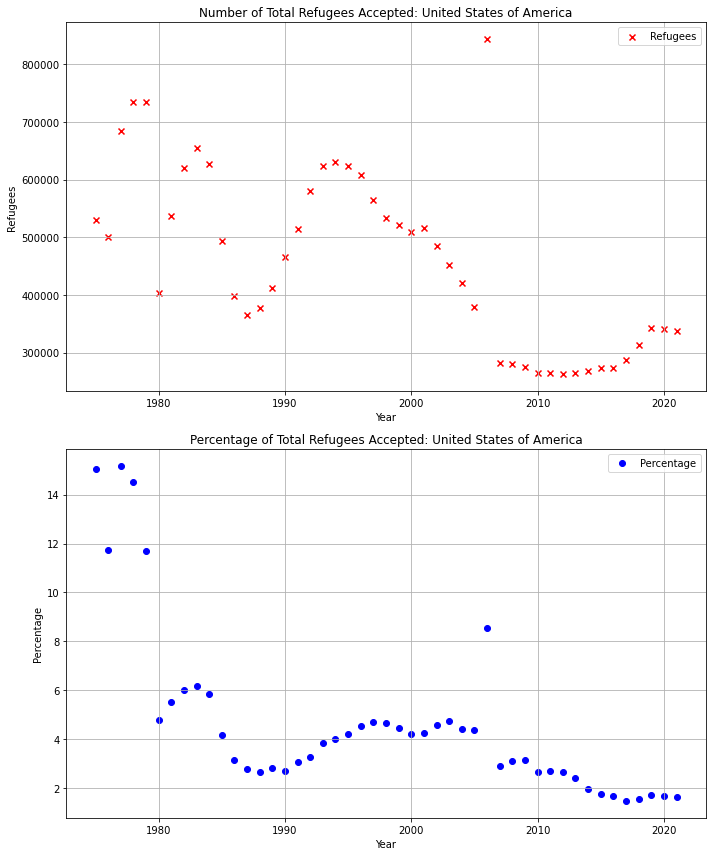

In [96]:
# Genrate the data for the country of choice
country = "United States of America"
df = refugee_acceptance_history(country)


# Create a 1x2 grid for subplots (2 row, 1 columns)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Adjust the figsize as needed

# Scatter plot for Percentage
ax2.scatter(df["Year"], df["Percentage"], label="Percentage", marker="o", color="blue")
ax2.set_xlabel("Year")
ax2.set_ylabel("Percentage")
ax2.set_title("Percentage of Total Refugees Accepted: "+country)
ax2.grid(True)  # Optional: Add a grid
ax2.legend()

# Scatter plot for Refugees
ax1.scatter(df["Year"], df["Refugees"], label="Refugees", marker="x", color="red")
ax1.set_xlabel("Year")
ax1.set_ylabel("Refugees")
ax1.set_title("Number of Total Refugees Accepted: "+country)
ax1.grid(True)  # Optional: Add a grid
ax1.legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()